# Gaussian Mixture Model(GMM) on Astrolab Data

# Data Overview:

The AstroML SDSS corrected spectra dataset consists of corrected spectral measurements from the Sloan Digital Sky Survey (SDSS). This data is used in astronomy to classify stars, galaxies, and quasars based on their spectral properties.

For your GMM, you're using only the first two features (the first two columns of the spectra matrix), which represent specific measurements from the star's spectrum.
Structure of the Data:

- The dataset contains multiple spectral observations for different astronomical objects.
- Each observation (data point) is a vector of spectral flux measurements. These are numerical values indicating the intensity of light received from a celestial object at various wavelengths.
- In this case, you're using just the first two columns (or features) of these flux measurements. These features might correspond to different wavelengths or specific characteristics of the star's light spectrum.

## Shape of the Data:

- The data matrix XX has dimensions N×DN×D, where:
- NN is the number of observations (data points).
- DD is the number of features (spectral measurements), but you are only using D=2D=2 in this case (the first two columns).

## Characteristics:

- High dimensionality: The original dataset can have a large number of features (flux measurements across different wavelengths), but you're focusing on just 2 dimensions for simplicity and visualization.
- Continuous values: Each feature is a continuous numerical value, which makes it suitable for GMM, as GMM assumes continuous, normally-distributed data.

## Why Use GMM on This Data?

GMM is a good fit for this dataset because stars or other celestial objects often fall into natural groups or clusters based on their spectral characteristics. By using GMM, you're trying to model these groups as mixtures of Gaussian distributions. Each cluster (Gaussian) can represent a group of stars with similar spectral properties.

# Import data and import necessary libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astroML.datasets import fetch_sdss_corrected_spectra

# Load the star data from astroML
data = fetch_sdss_corrected_spectra()
# Load the data safely ensuring the file is closed afterwards
with np.load('C:\\Users\\Machine-Learning\\astroML_data\\spec4000.npz') as data:
    # Perform operations with data here
    X = data['spectra'][:, :2]

downloading PCA-processed SDSS spectra from https://github.com/astroML/astroML-data/raw/main/datasets/spec4000.npz to C:\Users\Machine-Learning\astroML_data
[=========================================]  27.15Mb / 27.15Mb   


# Gaussian Mixture Model (GMM) Algorithm

## 1. Initialization of Parameters

We start by initializing the means, covariances, and weights (prior probabilities) for each Gaussian component.

### Means ($\mu_i$):
- Randomly initialize the means from the dataset $X$.
- Each Gaussian component is initialized with a mean that will be updated during the Expectation-Maximization (EM) process.

$$
\mu_i = \text{random sample from } X, \text{ for } i = 1, \dots, k
$$

### Covariances ($\Sigma_i$):
- The covariance matrices represent the spread or shape of each Gaussian component.
- We initialize each covariance matrix using the covariance of the entire dataset plus a small regularization term $\epsilon$ to ensure numerical stability during inversion.

$$
\Sigma_i = \text{Cov}(X) + \epsilon I
$$

### Weights $(\pi_i$):
- The weights represent the prior probabilities for each Gaussian component.
- Initially, we assume equal weights for all components:

$$
\pi_i = \frac{1}{k}, \text{ for } i = 1, \dots, k
$$

---

## 2. E-Step (Expectation)

In the E-step, we compute the responsibilities ($\gamma_{ij}$), which represent the probability that data point $X_i$ belongs to Gaussian component $j$.

### Gaussian Probability Density Function (PDF):

The PDF of a multivariate Gaussian distribution is given by:

$$
p(X_i \mid \mu_j, \Sigma_j) = \frac{1}{\sqrt{(2\pi)^d |\Sigma_j|}} \exp\left(-\frac{1}{2} (X_i - \mu_j)^T \Sigma_j^{-1} (X_i - \mu_j)\right)
$$

Where:
- $X_i$ is a data point.
- $\mu_j$ is the mean of the $j$-th Gaussian.
- $\Sigma_j$ is the covariance matrix of the $j$-th Gaussian.
- $d$ is the dimensionality of $X$.

### Responsibilities ($\gamma_{ij}$):

Responsibilities are computed using Bayes' Theorem and represent the posterior probability that a data point belongs to a given Gaussian:

$$
\gamma_{ij} = \frac{\pi_j p(X_i \mid \mu_j, \Sigma_j)}{\sum_{l=1}^{k} \pi_l p(X_i \mid \mu_l, \Sigma_l)}
$$

---

## 3. M-Step (Maximization)

In the M-step, we update the means, covariances, and weights using the responsibilities calculated in the E-step.

### Updating Means ($\mu_j$):

The updated mean for Gaussian component $j$ is computed as the weighted average of the data points, where the weights are the responsibilities:

$$
\mu_j = \frac{\sum_{i=1}^{N} \gamma_{ij} X_i}{\sum_{i=1}^{N} \gamma_{ij}}
$$

### Updating Covariances ($\Sigma_j$):

The covariance matrix for Gaussian component $j$ is updated as follows:

$$
\Sigma_j = \frac{\sum_{i=1}^{N} \gamma_{ij} (X_i - \mu_j)(X_i - \mu_j)^T}{\sum_{i=1}^{N} \gamma_{ij}}
$$

This computes the weighted covariance for each Gaussian.

### Updating Weights ($\pi_j$):

The weights are updated by averaging the responsibilities:

$$
\pi_j = \frac{\sum_{i=1}^{N} \gamma_{ij}}{N}
$$

---

## 4. Convergence Criterion

To determine when the algorithm should stop, we check for convergence based on the change in the means between iterations. The algorithm converges when the following condition is met:

$$
||\mu_{\text{new}} - \mu_{\text{old}}||_2 < \text{tol}
$$

---

## 5. Prediction

After fitting the GMM, we predict the cluster for each data point by assigning it to the Gaussian component with the highest responsibility:

$$
\text{predicted cluster} = \arg\max_j \gamma_{ij}
$$

---


# The Implementation

# Step-by-Step Guide for GMM `__init__` Method

## 1. Define Input Arguments
- The input arguments for the GMM class should include:
  - `k`: Number of Gaussian components (clusters).
  - `max_iters`: Maximum number of iterations for the EM algorithm.
  - `tol`: Tolerance for convergence (how small the changes in means should be for the algorithm to stop).

## 2. Store the Input Arguments
- Store these arguments as attributes of the class so they can be used later in other methods:
  - `self.k` for the number of components.
  - `self.max_iters` for the maximum number of iterations.
  - `self.tol` for the convergence threshold.

## 3. Define a Small Constant (Epsilon)
- Define a small constant, `epsilon`, to avoid numerical issues such as division by zero or matrix inversion problems:
  - Store this as `self.epsilon`, typically with a value like $1 \times 10^{-8}$.

## 4. Set up Additional Class Attributes
- Prepare to initialize other attributes that will be defined later during the GMM process:
  - Means of the Gaussian components (`self.means`).
  - Covariance matrices (`self.covariances`).
  - Weights for each Gaussian component (`self.pi`).

---

Once you implement this, check the attributes to make sure they're initialized correctly. I'll review your code and give feedback after you've written it.


# Step-by-Step Guide for the `_initialize_params` Method

## 1. Set a Random Seed
- To ensure reproducibility, set a random seed so that the random selections and calculations are consistent each time you run the algorithm.

**What to do:** 
- Use `np.random.seed(42)` to set a fixed seed for reproducibility.

## 2. Initialize the Means
- The means represent the center of each Gaussian component. Since you haven’t learned the clusters yet, randomly select `k` data points from $X$ to serve as the initial means.

**What to do:**
- Use `np.random.choice` to randomly select `k` rows from $X$ (without replacement).
- Set these selected points as the initial means for the Gaussian components.

## 3. Initialize the Covariances
- Covariances define the shape of each Gaussian component. Initialize the covariance matrix for each component by computing the covariance of the entire dataset $X$, and add a small random value to the diagonal to avoid matrix inversion issues.

**What to do:**
# Understanding the Covariance Matrix

When $X$ is a matrix with multiple features (columns), the covariance matrix measures the covariance between every pair of features. Each element in the covariance matrix $\Sigma$ represents how two features (columns) vary together.

For a matrix $X$ with dimensions $n \times d$ (where $n$ is the number of data points and $d$ is the number of features), the covariance matrix $\Sigma$ will be a $d \times d$ matrix where:

$$
\Sigma_{i,j} = \text{Cov}(X_i, X_j)
$$

- $\Sigma_{i,i}$ is the variance of feature $i$.
- $\Sigma_{i,j}$ is the covariance between feature $i$ and feature $j$.

---

## Step-by-Step: Calculating the Covariance Matrix for $X$

### Example Data:

Let’s say you have the following matrix $X$, where each row is a data point and each column is a feature:

$$
X = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6 \\
7 & 8
\end{bmatrix}
$$

Here, there are 4 data points (rows) and 2 features (columns). You will compute the covariance between the two columns.

---

### Steps:

### Step 1: Compute the Mean of Each Column

For each column (feature), compute the mean:

$$
\bar{X}_1 = \frac{1 + 3 + 5 + 7}{4} = 4, \quad \bar{X}_2 = \frac{2 + 4 + 6 + 8}{4} = 5
$$

---

### Step 2: Subtract the Mean from Each Value in the Column

For each value in the columns, subtract the mean of that column:

$$
X_1 - \bar{X}_1 = \begin{bmatrix} 1 - 4 \\ 3 - 4 \\ 5 - 4 \\ 7 - 4 \end{bmatrix} = \begin{bmatrix} -3 \\ -1 \\ 1 \\ 3 \end{bmatrix}
$$

$$
X_2 - \bar{X}_2 = \begin{bmatrix} 2 - 5 \\ 4 - 5 \\ 6 - 5 \\ 8 - 5 \end{bmatrix} = \begin{bmatrix} -3 \\ -1 \\ 1 \\ 3 \end{bmatrix}
$$

---

### Step 3: Multiply the Deviations for Covariances

Now, calculate the product of the deviations for each pair of features (columns):

- For variance of $X_1$ (Covariance of $X_1$ with itself):
$$
(-3)^2 + (-1)^2 + (1)^2 + (3)^2 = 9 + 1 + 1 + 9 = 20
$$

- For covariance between $X_1$ and $X_2$:
$$
(-3 \times -3) + (-1 \times -1) + (1 \times 1) + (3 \times 3) = 9 + 1 + 1 + 9 = 20
$$

- For variance of $X_2$ (Covariance of $X_2$ with itself):
$$
(-3)^2 + (-1)^2 + (1)^2 + (3)^2 = 9 + 1 + 1 + 9 = 20
$$

---

### Step 4: Divide by $n - 1$

Now divide by $n - 1$ (where $n = 4$, so $n - 1 = 3$):

- For variance of $X_1$:
$$
\frac{20}{3} = 6.67
$$

- For covariance between $X_1$ and $X_2$:
$$
\frac{20}{3} = 6.67
$$

- For variance of $X_2$:
$$
\frac{20}{3} = 6.67
$$

---

### Step 5: Construct the Covariance Matrix

Now, construct the covariance matrix $\Sigma$, which will be:

$$
\Sigma = \begin{bmatrix}
6.67 & 6.67 \\
6.67 & 6.67
\end{bmatrix}
$$

---

### Step 6: Calculating Many Covariance Matrices

MM requires a separate covariance matrix for each Gaussian component (cluster). You should initialize `k` covariance matrices (one for each component) based on the dataset.

### General Case:

For a matrix $X$ with $d$ features (columns), you calculate the covariance between every pair of columns. The covariance matrix is constructed by following the same process for every pair of columns, including the covariance of each column with itself (which is just the variance).

---

### Summary:

If you have just the matrix $X$, the covariance is calculated between the features (columns) of $X$. The process involves:

1. Calculating the mean of each column.
2. Subtracting the mean from each element in the column.
3. Multiplying the deviations for each pair of columns to calculate the covariance.
4. Dividing by $n - 1$ to get the final covariance.
5. Constructing the covariance matrix.
6. Create many covariance matrices.

- Add a small random value to the diagonal using `np.eye(X.shape[1]) * np.random.rand() * 0.1` to ensure the covariance matrix is positive semi-definite.

## 4. Initialize the Weights (Priors)
- The weights (priors) represent the initial probability of each Gaussian component. Since there is no prior information, start with equal weights for all components.

**What to do:**
- Set the weights (`pi`) to be equal for each component, i.e., $\frac{1}{k}$.
- self.pi should be a vector of size `k`, where each element is initialized to $\frac{1}{k}$​ (i.e., equal probabilities for each component).

---

Once you've implemented this method, make sure the parameters (means, covariances, and weights) are properly initialized and reflect the structure of your data. After that, we can move on to the next section of the GMM.


# Math Behind the Gaussian PDF

### Gaussian Mixture Model (GMM) Overview

GMM assumes that the data points are generated from a mixture of several Gaussian distributions. Each Gaussian component represents a cluster, and GMM uses the Expectation-Maximization (EM) algorithm to estimate the parameters (mean, covariance, and weight) of each Gaussian component.

### Multivariate Gaussian (Normal) Distribution

The probability density function (PDF) of a multivariate Gaussian distribution is an extension of the univariate normal distribution to multiple dimensions.

For a point $X_i$ in $n$-dimensional space, the PDF of a multivariate Gaussian distribution is given by:

$$
\mathcal{N}(X_i \mid \mu, \Sigma) = \frac{1}{(2 \pi)^{n/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(X_i - \mu)^T \Sigma^{-1} (X_i - \mu)\right)
$$

Where:
- $X_i$ is the data point.
- $\mu$ is the mean vector (location of the Gaussian).
- $\Sigma$ is the covariance matrix (shape and orientation of the Gaussian).
- $\Sigma^{-1}$ is the inverse of the covariance matrix.
- $|\Sigma|$ is the determinant of the covariance matrix.
- $n$ is the number of dimensions (features).

### Key Components

#### 1. Mean Vector $\mu$
- Represents the center (location) of the Gaussian in each dimension.
- Has the same dimensionality as the data points, i.e., $\mu \in \mathbb{R}^n$.

#### 2. Covariance Matrix $\Sigma$
- Describes the spread or shape of the Gaussian in multiple dimensions.
- Captures the variance of each feature and the correlation between features.
- Size: $n \times n$.

#### 3. Mahalanobis Distance (Exponent Part)
- The term $(X_i - \mu)^T \Sigma^{-1} (X_i - \mu)$ computes the squared distance of the point $X_i$ from the mean $\mu$, scaled by the covariance matrix. This is called the **Mahalanobis distance**.

$$
D^2 = (X_i - \mu)^T \Sigma^{-1} (X_i - \mu)
$$

- If the covariance matrix is large in some direction, the distance in that direction is "cheaper," meaning the Gaussian is more spread out.

#### 4. Normalization Constant
The first part of the formula normalizes the distribution:

$$
\frac{1}{(2 \pi)^{n/2} |\Sigma|^{1/2}}
$$

- $|\Sigma|$ is the **determinant** of the covariance matrix, which reflects the volume of the Gaussian distribution’s ellipsoid.
- The factor $(2 \pi)^{n/2}$ is derived from the properties of the normal distribution.

### Detailed Math Explanation

1. **Mahalanobis Distance**:
   $$
   D^2 = (X_i - \mu)^T \Sigma^{-1} (X_i - \mu)
   $$
   - The Mahalanobis distance measures how far a point is from the mean in a way that accounts for both variance and correlation between dimensions.

2. **Determinant of the Covariance Matrix**:
   $$
   |\Sigma|
   $$
   - Measures the "volume" of the Gaussian ellipsoid. Larger determinants mean a broader Gaussian, while smaller determinants mean a narrower Gaussian.

3. **Exponent and Probability**:
   $$
   \exp\left(-\frac{1}{2}(X_i - \mu)^T \Sigma^{-1} (X_i - \mu)\right)
   $$
   - The probability decreases exponentially as the point $X_i$ moves away from the mean.

4. **Normalization**:
   $$
   \frac{1}{(2 \pi)^{n/2} |\Sigma|^{1/2}}
   $$
   - Ensures that the integral of the Gaussian over the entire space equals 1.

### Summary of the Process

When calculating the Gaussian PDF for each point $X_i$:
1. Subtract the mean: $X_i - \mu$.
2. Compute the Mahalanobis distance using the inverse covariance matrix.
3. Compute the determinant of the covariance matrix for the normalization factor.
4. Apply the Gaussian formula to compute the PDF value for each point $X_i$.

### Gaussian Mixture Model (GMM) Context

In GMM, the **_gaussian_pdf** function calculates the probability that a data point $X_i$ belongs to a particular Gaussian component $j$. The Expectation-Maximization (EM) algorithm uses this PDF to compute the responsibilities during the E-step, which are then used to update the parameters (mean, covariance, and weights) in the M-step.

- **E-Step**: Calculate the responsibilities (probabilities) that each point belongs to each Gaussian component.
- **M-Step**: Update the parameters of each Gaussian component based on the responsibilities.
  
### Why Not Use $n/2$ Directly?

You don’t directly use $n/2$ in the code because:

- $n/2$ is already implied by the mathematical formula when you raise $(2 \pi)$ to the power of $n/2$. This comes from the normalization constant in the multivariate Gaussian formula.

#### For example, when you see something like:
$$
\frac{1}{(2 \pi)^n |\Sigma|}
$$

This is shorthand for:
$$
\frac{1}{(2 \pi)^{n/2} |\Sigma|^{1/2}}
$$

The $n/2$ appears as part of the normalization constant to account for the fact that you're working in $n$-dimensional space.



# Steps to Follow:

1. Compute the Dimensionality:
First, get the number of features in the data (the number of columns in `X`). This represents the dimensionality of the multivariate Gaussian distribution.

2. Regularize the Covariance Matrix:
To avoid numerical issues like singular matrices, add a small value `epsilon` to the diagonal of the covariance matrix. This makes the matrix invertible and ensures stability.

3. Inverse of the Covariance Matrix:
        After regularizing the covariance matrix, invert it. You’ll need this for the exponent part of the Gaussian PDF formula.

4. Calculate the Exponent:
        Compute the difference between each data point in `X` and the mean vector. This will help in calculating the Mahalanobis distance.
        Use an efficient method (like matrix multiplication) to calculate the quadratic form: the difference matrix multiplied by the inverse covariance matrix, then by itself again.

5. Calculate the Determinant:
        The Gaussian PDF requires the determinant of the covariance matrix. Use the regularized covariance matrix for this calculation.

6. Compute the Final PDF:
        Using the values from steps 4 and 5, compute the final Gaussian PDF for each data point in `X`. This involves multiplying by the normalization factor and applying the exponent.

7. Return the Result:
        Once you have the PDF values for all data points, return them.

### Step-by-Step Guide to Implementing the E-Step

#### **Step 1: Initializing the Likelihoods Matrix**
In the E-step, we need to compute the likelihood of each data point belonging to each Gaussian component. This will require a matrix to store the likelihoods for all data points across all Gaussian components.

- **Action**: First, initialize a matrix of zeros. The matrix should have dimensions equal to the number of data points in $X$ (rows) and the number of Gaussian components $k$ (columns).
- **Math**: If you have $n$ data points and $k$ Gaussian components, this matrix will have a shape of $n \times k$.

The reason for initializing this matrix is that you will store the likelihood of each data point $X_i$ belonging to each Gaussian component $j$.

#### **Step 2: Loop Through Gaussian Components**
For each Gaussian component $j$, compute the likelihood of all data points $X_i$ using the **Gaussian PDF**. For each component $j$, this likelihood is given by:

$$
\pi_j \cdot \mathcal{N}(X_i \mid \mu_j, \Sigma_j)
$$

Where:
- $\pi_j$ is the prior probability (mixing coefficient) for component $j$,
- $\mathcal{N}(X_i \mid \mu_j, \Sigma_j)$ is the Gaussian PDF for component $j$.

- **Action**: Loop over all Gaussian components $j$ (from 0 to $k-1$) and for each component, compute the likelihood for all data points. Multiply this likelihood by the prior probability $\pi_j$ of that component.
- **Math**: The product of $\pi_j$ and the Gaussian PDF gives the likelihood that each data point belongs to component $j$.

#### **Step 3: Compute Responsibilities**
Once you have all the likelihoods, compute the **responsibilities** for each data point, which are the normalized likelihoods across all components. The responsibility is the probability that a data point $X_i$ belongs to a specific Gaussian component $j$, and it's calculated by normalizing the likelihoods.

For each data point $X_i$, the responsibility for component $j$ is given by:

$$
r_{ij} = \frac{\pi_j \cdot \mathcal{N}(X_i \mid \mu_j, \Sigma_j)}{\sum_{k=1}^K \pi_k \cdot \mathcal{N}(X_i \mid \mu_k, \Sigma_k)}
$$

- **Action**: Normalize the likelihoods for each data point across all components so that the sum of the responsibilities for each data point is 1.
- **Math**: This normalization ensures that the sum of the responsibilities for each data point across all components is equal to 1, which makes the responsibilities valid probabilities.
- The numerator is the likelihood of $X_i$​ belonging to component `j`.
- The denominator is the sum of the likelihoods across all components `k` for the data point $X_i$​. This ensures that the responsibilities sum to 1 across all components for each data point

#### **Step 4: Return the Responsibilities**
Finally, after computing the responsibilities, return this matrix, which will be used in the M-step to update the parameters (means, covariances, and mixing coefficients) of the Gaussian components.


### M-Step: Updating the Parameters (Mixing Coefficients, Means, Covariances)

#### **Step 1: Calculate $N_k$ (Effective Number of Data Points for Each Component)**

- $N_k$ is the sum of the responsibilities for each component, representing the "effective" number of data points assigned to each Gaussian component.
  
$$
N_k[j] = \sum_{i=1}^{n} r_{ij}
$$

Where:
- $r_{ij}$ is the responsibility of data point $X_i$ for component $j$.

- **Action**: 
  - Sum the responsibilities for each component. This gives you a vector where each entry corresponds to $N_k$ for each component $j$.

#### **Step 2: Update the Mixing Coefficients $\pi_j$**

- The mixing coefficients (priors) represent the proportion of data points assigned to each Gaussian component, calculated as:
  
$$
\pi_j = \frac{N_j}{N}
$$

Where:
- $N_j$ is the sum of responsibilities for component $j$, and $N$ is the total number of data points.

- **Action**:
  - Divide $N_k$ (the sum of responsibilities for each component) by the total number of data points $X.shape[0]$. This updates the prior probabilities $\pi_j$.

#### **Step 3: Update the Means $\mu_j$**

- The mean of each Gaussian component is updated using the weighted sum of the data points, weighted by the responsibilities:

$$
\mu_j = \frac{\sum_{i=1}^{n} r_{ij} X_i}{N_j}
$$

Where:
- $r_{ij}$ is the responsibility of data point $i$ for component $j$, and $X_i$ is the data point.

- **Action**:
  - Compute the new means by taking the dot product of the transposed responsibilities matrix and the data points $X$, and then divide by $N_k$.

#### **Step 4: Update the Covariance Matrices $\Sigma_j$**

- The covariance matrix measures the spread of the data points around the updated mean $\mu_j$, weighted by the responsibilities:

$$
\Sigma_j = \frac{\sum_{i=1}^{n} r_{ij} (X_i - \mu_j)(X_i - \mu_j)^T}{N_j} + \epsilon I
$$

Where:
- $r_{ij}$ is the responsibility of data point $i$ for component $j$,
- $X_i - \mu_j$ is the difference between each data point and the updated mean,
- $\epsilon I$ is a small term added to the diagonal for regularization.

- **Action**:
  - For each component, calculate the weighted covariance matrix by computing the differences between the data points and the updated means, and weight them by the responsibilities.
  - Add the regularization term $\epsilon$ to ensure numerical stability.


### Mathematics Behind Log-Likelihood in GMM

In the context of a Gaussian Mixture Model (GMM), the log-likelihood measures how well the model fits the data. The log-likelihood is calculated as:

$$
\log L = \sum_{i=1}^{n} \log \left( \sum_{j=1}^{k} \pi_j \cdot N(X_i \mid \mu_j, \Sigma_j) \right)
$$

Where:
- $n$ is the number of data points.
- $k$ is the number of Gaussian components.
- $\pi_j$ is the mixing coefficient for component $j$.
- $N(X_i \mid \mu_j, \Sigma_j)$ is the Gaussian probability density function (PDF) for component $j$, evaluated at data point $X_i$, where:
  - $\mu_j$ is the mean of component $j$.
  - $\Sigma_j$ is the covariance matrix of component $j$.

This expression calculates the log-likelihood by summing the logarithm of the total probability for each data point $X_i$, where the total probability is the sum of probabilities across all Gaussian components.

### Step-by-Step Explanation

1. **Compute the PDF for Each Component**:
   - For each data point $X_i$ and each Gaussian component $j$, compute the probability $N(X_i \mid \mu_j, \Sigma_j)$, using the multivariate Gaussian PDF formula.

2. **Weight the PDF by Mixing Coefficients $\pi_j$**:
   - Multiply the Gaussian PDF by the mixing coefficient $\pi_j$ to get the **weighted likelihood** for each component.

3. **Sum the Weighted Likelihoods for All Components**:
   - For each data point $X_i$, sum the weighted likelihoods across all components $j$. This gives the total likelihood for that data point.

4. **Take the Logarithm of the Total Likelihood**:
   - Take the logarithm of the total likelihood for each data point. Add a small value $\epsilon$ to prevent log of zero.

5. **Sum Over All Data Points**:
   - Sum the logarithms of the total likelihoods over all data points to get the final log-likelihood for the dataset.

### Building the Log-Likelihood Function

1. **Initialize Storage for Weighted Likelihoods**:
   - Initialize an array to store the weighted likelihoods for each data point and each component.

2. **Loop Over Components**:
   - For each component $j$, compute the **Gaussian PDF** for all data points, using the current mean and covariance matrix for that component.
   - Multiply this PDF by the mixing coefficient $\pi_j$ to get the **weighted likelihood**.

3. **Sum the Weighted Likelihoods**:
   - For each data point, sum the weighted likelihoods over all components to compute the **total likelihood** for that data point.

4. **Take the Logarithm**:
   - Take the logarithm of the total likelihood for each data point, and add $\epsilon$ for numerical stability.

5. **Sum Over All Data Points**:
   - Finally, sum the logarithms of the total likelihoods over all data points to compute the **log-likelihood** of the dataset.


In [14]:
# Gaussian Mixture Model (GMM) implementation
class GMM:
    def __init__(self, k=2, max_iters=100, tol=1e-4, epsilon = 1*10**-8):
        self.k = k # Number of components
        self.max_iters = max_iters #Maximum Iterations
        self.tol=tol # Convergence threshold
        self.epsilon = epsilon # Small constant to prevent numerical issues
        
    def _initialize_params(self, X): 
        self.means = X[np.random.choice(X.shape[0], self.k, replace=False)] #The randomly selected means
        self.covariances = [self._covariance(X) for _ in range(self.k)] # A covariance matrix is made for every single component. np.cov would work, but I hand coded a helper function to do this
        self.pi = 1/self.k*np.ones(self.k) # Equal probabilities for each component

    def _covariance(self,matrix): #Hand coded helper function instead of np.cov
        average_matrix = np.divide(np.sum(matrix, axis=0), matrix.shape[0]) #Calculating the average of each column
        result = matrix - average_matrix #Subtract the average from each element in the column
        covariances = np.dot(result.T,result) #Multiplying the deviations for covariances
        divided_covariances = covariances/(matrix.shape[0]-1) #dividing the covariance by n-1
        return (divided_covariances+np.eye(matrix.shape[1]) * self.epsilon) #Returning the covariance matrix with a tiny number added to the diagonal to prevent singular matrix

    def _gaussian_pdf(self, X, mean, cov): 
        cols_in_X = X.shape[1] #The columns in X
        regularized_covariance_matrix = cov+self.epsilon*np.eye(cols_in_X) #Regularized covariance matrix
        inverted_covariance_matrix = np.linalg.inv(regularized_covariance_matrix) #The inverted covariance matrix
        mahalanobis_distance =  self._mahalanobis_distance(X,mean, inverted_covariance_matrix)#The Mahalanobis distance
        determinant_regularized_covariance_matrix = np.linalg.det(regularized_covariance_matrix) #The determinant of the regularized covariance matrix
        n = X.shape[1] # Features
        Gaussian = (1 / np.sqrt((2 * np.pi) ** n * determinant_regularized_covariance_matrix)) * np.exp(-0.5 * mahalanobis_distance) #Gaussian PDF
        return Gaussian
        
    def _mahalanobis_distance(self,matrix,mean, inverted_covariance_matrix): #Calculating the Mahalanobis distance
        diff = list() # New list to hold all the different distances
        for row in matrix: #Go through each row to calculate the distances
            diff.append((row-mean)@inverted_covariance_matrix@(row-mean)) #put each Mahalanobis distance in the list
        return np.array(diff) #turn list to an numpy array and return it
        

    def _e_step(self, X): 
        likelihoods = np.zeros((X.shape[0],self.k)) #Matrix of zeroes for storing log-likelihoods

        for i in range(self.k): #Going through every single Gaussian component
            likelihoods[:, i] = self.pi[i]*self._gaussian_pdf(X,self.means[i],self.covariances[i]) #Insert the likelihoods into the i-th column
        responsibilities = likelihoods/(np.sum(likelihoods, axis=1,keepdims=True)+self.epsilon) #Normallizing and calculating the responsibilities
        return responsibilities

    def _m_step(self, X, responsibilities): 
        sum_responsibilities = np.sum(responsibilities, axis=0)  # Sum of responsibilities for each component (N_k)
    
        for i in range(self.k):  # Loop over each Gaussian component
            self.pi[i] = sum_responsibilities[i] / X.shape[0] # Update the mixing coefficients (priors)
            self.means[i] = np.dot(responsibilities[:, i], X) / sum_responsibilities[i] # Update the means

        # Update the covariance matrices
            diff = X - self.means[i]  # Difference between the data points and the updated mean for component i
            cov = np.zeros((X.shape[1], X.shape[1]))  # Initialize the covariance matrix
        # Compute the covariance matrix manually
            for j in range(X.shape[0]):  # Loop over all data points
                outer_product = np.outer(diff[j], diff[j])  # Compute the outer product of the difference vector
                cov += responsibilities[j, i] * outer_product  # Weight by the responsibility for component i
            self.covariances[i] = cov / sum_responsibilities[i] + self.epsilon * np.eye(X.shape[1])  # Normalize the covariance matrix and add a small regularization term for numerical stability



    def _compute_log_likelihood(self,X):
        number_of_samples = X.shape[0]
        weighted_likelihoods = np.zeros((number_of_samples, self.k)) #The array that will hold the weighted likelihoods

        for j in range(self.k): #Go through each component and calculate the weighted likelihoods
            weighted_likelihoods[:,j]= self.pi[j]*self._gaussian_pdf(X, self.means[j], self.covariances[j]) # holding all the weighted likelihoods. If no priors are multiplied, then all weights are equally likely which is wrong.

        summed_likelihoods = np.sum(weighted_likelihoods, axis=1) #Sum all the likelihoods
        log_summed_likelihoods = np.sum(np.log(summed_likelihoods + self.epsilon)) # Find the log of all datapoints, and then sum over all the datapoints.

        return log_summed_likelihoods 

    def fit(self, X):
        self._initialize_params(X)
        prev_log_likelihood = None
        for i in range(self.max_iters):
            old_means = self.means.copy()
            responsibilities = self._e_step(X)
            self._m_step(X, responsibilities)

        # Compute log-likelihood
            log_likelihood = self._compute_log_likelihood(X)
            print(f"Iteration {i}, Log-Likelihood: {log_likelihood}")

        # Check for convergence based on log-likelihood
            if prev_log_likelihood is not None and abs(log_likelihood - prev_log_likelihood) < self.tol:
                print(f"Converged at iteration {i}")
                
                break
            print(f"Iteration {i}, Centroids: {self.means}")
            prev_log_likelihood = log_likelihood


    def predict(self, X): 
        responsibilities = self._e_step(X)
        return np.argmax(responsibilities, axis=1)


# Predicting and Plotting

Iteration 0, Log-Likelihood: -733.4904769192265
Iteration 0, Centroids: [[0.06138959 0.06116743]
 [0.06138959 0.06116743]]
Iteration 1, Log-Likelihood: 7234.341056026093
Iteration 1, Centroids: [[0.01362251 0.01332566]
 [0.01362251 0.01332566]]
Iteration 2, Log-Likelihood: 23857.201400827325
Iteration 2, Centroids: [[-0.00010145 -0.00010091]
 [-0.00010145 -0.00010091]]
Iteration 3, Log-Likelihood: 49792.046832639695
Iteration 3, Centroids: [[-1.0868270e-05 -1.0862542e-05]
 [-1.0868270e-05 -1.0862542e-05]]
Iteration 4, Log-Likelihood: 57101.085737900205
Iteration 4, Centroids: [[0. 0.]
 [0. 0.]]
Iteration 5, Log-Likelihood: 57101.085737900205
Converged at iteration 5


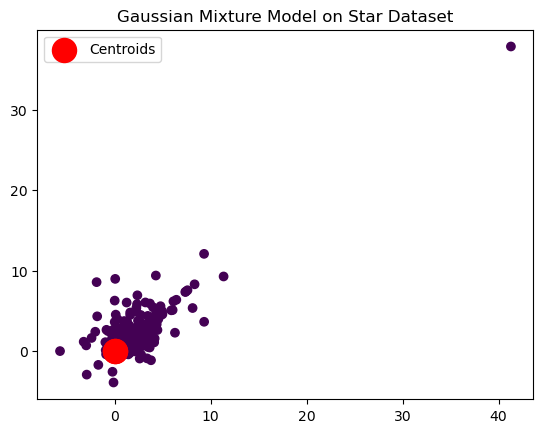

In [16]:
# Initialize and fit the GMM
gmm = GMM(k=2)
gmm.fit(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), cmap='viridis')
plt.scatter(gmm.means[:, 0], gmm.means[:, 1], s=300, c='red', label='Centroids')
plt.title('Gaussian Mixture Model on Star Dataset')
plt.legend()
plt.show()

# Compare this hand coded version with the official sklearn version

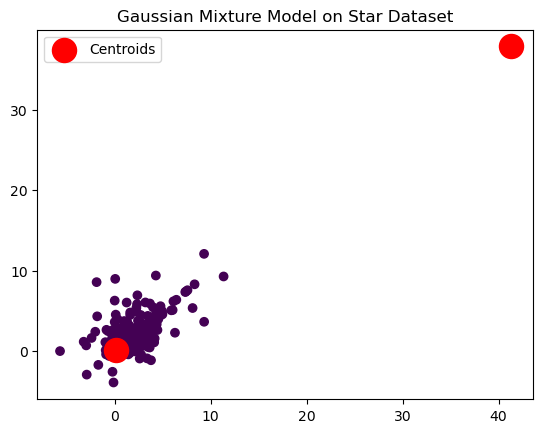

Centroids (means) of the Gaussian components:
[[ 0.09526292  0.11272666]
 [41.28628159 37.88919449]]


In [18]:
from sklearn.mixture import GaussianMixture

# Initialize and fit the GMM
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X)

# Predict cluster labels
labels = gmm.predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=300, c='red', label='Centroids')
plt.title('Gaussian Mixture Model on Star Dataset')
plt.legend()
plt.show()
# Print the coordinates of the centroids
print("Centroids (means) of the Gaussian components:")
print(gmm.means_)

# Cleaning up after the model has run

In [20]:
import os

# Path to the dataset file (replace with your actual file path)
file_path = 'C:\\Users\\Machine-Learning\\astroML_data\\spec4000.npz'

# Check if the file exists before attempting to delete
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"File {file_path} has been deleted.")
else:
    print(f"File {file_path} does not exist.")

File C:\Users\Machine-Learning\astroML_data\spec4000.npz has been deleted.


# Conclusion:

The algorithm finds one of the centroids similar to sci-kit learn, but the other centroid is not at the same position. This may be due to differences on how Sci-kits algorithm runs from mine, or due to differences in initialization.